In [225]:
# import random
# import subprocess
# import sys

# # available samples
# chr1_file = '1000Genomes/ALL.chr1.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz'
# ls_samples = subprocess.check_output("bcftools query -l " + chr1_file, shell=True).decode(sys.stdout.encoding)
# samples = ls_samples.split('\n')

In [226]:
# generate random parents
# parents = random.sample(samples, 2)
# print(parents)

In [227]:
# store min and max positions of each chromosome in a file
# pos_str = 'CHROM\tMIN_POS\tMAX_POS\n'
# for chrom in range (1, 23):
#     print("chromosome: " + str(chrom))
#     chrom_file = '1000Genomes/ALL.chr' + str(chrom) + '.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz'
#     min_pos = subprocess.check_output('bcftools view -H ' + chrom_file + ' | head -1 | awk \'(NR==1) {print $2}\'', shell=True).decode(sys.stdout.encoding).strip()
#     max_pos = subprocess.check_output('zcat ' + chrom_file + ' | tail -n 1 | awk \'{print $2}\'', shell=True).decode(sys.stdout.encoding).strip()
#     pos_str += str(chrom) + '\t' + str(min_pos) + '\t' + str(max_pos) + '\n'
#     print('\tmin: ' + str(min_pos))
#     print('\tmax: ' + str(max_pos))
# pos_file = open('chromosome_min_max_pos.txt', 'w')
# pos_file.write(pos_str)
# pos_file.close()

In [228]:
# import numpy as np
# import csv
# import pandas as pd
# snp_df = None
# def sim_recomb(parent_ids, snp_file=None, out_file=None):
#     # read snp file
#     if snp_file: # should have columns for Chromosome, RSID, and Disease
#         chrom_to_rsids = {} # chrom to rsids
#         rsid_to_disease = {} # rsid to disease
#         with open(snp_file, 'r') as f:
#             csv_reader = csv.reader(f, delimiter='\t')
#             for row in csv_reader:
#                 if row[0] == 'Chromosome':
#                     continue
#                 chrom = row[0]
#                 rsid = row[1]
#                 disease = row[2]
#                 if chrom not in chrom_to_rsids.keys():
#                     chrom_to_rsids[chrom] = []
#                 chrom_to_rsids[chrom].append(rsid)
#                 rsid_to_disease[rsid] = disease
    
#     if out_file is None:
#         out_file = '_'.join(parent_ids) + '.txt'
#     # go through each chromosome
#     for chrom in range(1, 23):
#         if snp_file is not None:
#             if str(chrom) not in chrom_to_rsids.keys():
#                 continue
#             cur_rsids = chrom_to_rsids[str(chrom)]
#             if len(cur_rsids) == 0:
#                 continue
#             tmp_file = 'tmp_snps.list'
#             tmp_f = open(tmp_file, 'w')
#             tmp_f.write('\n'.join(cur_rsids))
#             tmp_f.close()
        
#         print("chromosome: " + str(chrom))
#         chrom_file = '1000Genomes/ALL.chr' + str(chrom) + '.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz'
#         if out_file is None:
#             out_file = 'chr' + str(chrom) + '_' + '_'.join(parent_ids) + '.txt'
        
#         # bcftools query -f ['%CHROM\t%POS\t%ID\t%REF\t%ALT\t%GT\n'] -s HG00379,HG00155 1000Genomes/ALL.chr1.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz | awk  '{ if(NR%2 == 1) p = $6; else if (NR%2 == 0) print $0"\t"p; }' | awk 'BEGIN{print "CHROM\tPOS\tID\tREF\tALT\tPARENT1\tPARENT2"}1'
#         bcf_cmd = 'bcftools query -f \'%CHROM\\t%POS\\t%ID\\t%REF\\t%ALT\\t[%GT\\t]]\n\' -s ' + ','.join(parent_ids) 
#         if snp_file is not None:
#             bcf_cmd += ' --include ID==@'+ tmp_file
#         bcf_cmd += ' ' + chrom_file
        
#         # header only if one output file not specified or is first header
#         if chrom == 1 or out_file is None:
#             bcf_cmd += ' | awk \'BEGIN{print "CHROM\\tPOS\\tID\\tREF\\tALT\\t' + parent_ids[0] + '\\t' + parent_ids[1] + '"}1\''
#         bcf_cmd += ' >> ' + out_file
#         subprocess.check_output(bcf_cmd, shell=True).decode(sys.stdout.encoding)
# # sim_recomb(parents, 1)
# sim_recomb(parents, 'all_snps_data.txt', 'snps_out.txt')


In [284]:
import numpy as np
import csv
import pandas as pd

vcf_head_cmd = 'bcftools view -h 1000Genomes/ALL.chr1.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz  | sed \'/^##/d\''
all_samps = subprocess.check_output(vcf_head_cmd, shell=True).decode(sys.stdout.encoding).split('\t')[9:]
out_file = 'all_parents_nf_snp.txt'
# snp_file = 'all_snps_data.txt'
snp_file = 'nf_snps.list'

# read snp file
chrom_to_rsids = {} # chrom to rsids
rsid_to_disease = {} # rsid to disease
with open(snp_file, 'r') as f:
    csv_reader = csv.reader(f, delimiter='\t')
    for row in csv_reader:
        if row[0] == 'Chromosome':
            continue
        chrom = row[0]
        rsid = row[1]
        disease = row[2]
        if chrom not in chrom_to_rsids.keys():
            chrom_to_rsids[chrom] = []
        chrom_to_rsids[chrom].append(rsid)
        rsid_to_disease[rsid] = disease

# go through each chromosome
for chrom in range(1, 23):
    if str(chrom) not in chrom_to_rsids.keys():
        continue
    cur_rsids = chrom_to_rsids[str(chrom)]
    if len(cur_rsids) == 0:
        continue
    tmp_file = 'tmp_snps.list'
    tmp_f = open(tmp_file, 'w')
    tmp_f.write('\n'.join(cur_rsids))
    tmp_f.close()

    print("chromosome: " + str(chrom))
    chrom_file = '1000Genomes/ALL.chr' + str(chrom) + '.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz'

    # bcftools query -f ['%CHROM\t%POS\t%ID\t%REF\t%ALT\t%GT\n'] -s HG00379,HG00155 1000Genomes/ALL.chr1.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz | awk  '{ if(NR%2 == 1) p = $6; else if (NR%2 == 0) print $0"\t"p; }' | awk 'BEGIN{print "CHROM\tPOS\tID\tREF\tALT\tPARENT1\tPARENT2"}1'
    bcf_cmd = 'bcftools query -f \'%CHROM\\t%POS\\t%ID\\t%REF\\t%ALT\\t[%GT\\t]]\n\' --include ID==@'+ tmp_file + ' ' + chrom_file

    # header only if one output file not specified or is first header
#     if chrom == 1:
#         bcf_cmd += ' | awk \'BEGIN{print "CHROM\\tPOS\\tID\\tREF\\tALT\\t' + '\\t'.join(all_samps) + '"}1\''
    bcf_cmd += ' >> ' + out_file
    subprocess.check_output(bcf_cmd, shell=True).decode(sys.stdout.encoding)


chromosome: 17


In [175]:
snp_df = pd.read_csv(all_snp_file, sep='\t')
snp_df.columns


,#CHROM,POS,ID,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,1,44438974,rs7161,C,T,1|1,1|1,1|0,1|1,1|0,...,1|1,0|1,1|0,0|1,1|1,1|1,0|1,0|0,1|1,1|1
1,1,44440146,rs4660761,G,A,1|1,1|1,1|0,1|1,1|0,...,1|1,0|1,1|0,1|1,1|1,1|1,0|1,0|0,1|1,1|1
2,1,98552832,rs1198588,A,T,1|0,0|0,0|1,1|1,1|1,...,1|0,1|1,0|1,1|1,0|1,0|0,1|1,0|1,0|0,0|1
3,1,243663893,rs14403,C,T,0|0,0|0,1|0,0|0,0|1,...,0|0,0|0,0|0,0|0,0|0,1|0,0|0,0|0,1|0,0|0
4,2,200715388,rs2949006,T,G,1|1,0|1,1|1,1|1,1|1,...,1|1,1|1,1|1,1|1,1|1,1|1,1|1,1|1,1|0,1|1
5,2,233743109,rs778371,A,G,0|0,0|0,0|0,0|0,0|0,...,1|1,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|1
6,3,52838402,rs4687552,T,C,0|0,0|0,0|0,0|0,1|0,...,0|0,0|1,0|0,1|1,0|0,0|1,0|0,1|0,1|0,1|0
7,5,142780339,rs6189,C,T,0|0,0|0,0|0,0|0,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,1|0
8,5,152540354,rs2910032,C,T,0|0,0|1,0|1,0|0,0|1,...,0|1,1|0,0|0,1|0,1|0,0|1,0|1,1|0,0|1,0|0
9,6,35542476,rs3800373,C,A,1|0,0|1,0|0,1|1,1|1,...,0|0,1|1,0|1,0|0,1|0,0|1,0|0,1|1,1|1,0|1


In [172]:
import numpy as np
# now add offspring
num_offspring = 1000
parent_ids = ['NA19351', 'HG02733'] # CHANGE
all_snp_file = 'all_parents_snps.tsv'
col_names = ['#CHROM', 'POS', 'ID', 'REF', 'ALT']
col_names.extend(parent_ids)

snp_df = pd.read_csv(all_snp_file, sep='\t') #, names=col_names, skiprows=1)
snp_df = snp_df[col_names]
for i in range(num_offspring):
    snp_df['OS_' + str(i)] = np.nan
pos_file_path = 'chromosome_min_max_pos.txt'
pos_file = open(pos_file_path)
pos_arr = np.loadtxt(pos_file, delimiter="\t", skiprows=1)

par1_id = parent_ids[0]
par2_id = parent_ids[1]


In [326]:
for o in range(num_offspring):
    for chrom in range(1, 23):
        min_pos = int(pos_arr[chrom-1][1])
        max_pos = int(pos_arr[chrom-1][2])
        
        # select if x-over occurs from each parent
#         par1_crossover = random.randint(0,1) # 0 - doesn't occur, 1 - does occur
#         par2_crossover = random.randint(0,1) # 0 - doesn't occur, 1 - does occur
        par1_crossover = 1 # 0 - doesn't occur, 1 - does occur
        par2_crossover = 1 # 0 - doesn't occur, 1 - does occur

        # randomly choose crossover positions
        cross_pos1 = random.randint(int(min_pos), int(max_pos))
        cross_pos2 = random.randint(int(min_pos), int(max_pos))

        # randomly choose direction
        # 0 - before crossover pos from chromatid 1, after from chromatid 2
        # 1 - before crossover pos from chromatid 2, after from chromatid 1
        direc1 = random.randint(0,1)
        direc2 = random.randint(0,1)
        direcs = [np.less, np.greater]

        # randomly choose chromatid 1
        par1_chromatid = random.randint(0,1) # if crossover, is chromatid 1 otherwise is only chromatid
        par2_chromatid = random.randint(0,1)

        # correct values if crossover doesn't occur
        if not par1_crossover:
            cross_pos1 = -1
            direc1 = 1
        if not par2_crossover:
            cross_pos2 = -1
            direc2 = 1
            
        for index, row in snp_df[snp_df['#CHROM'] == chrom].iterrows():
            pos = row['POS']
            par1_gt = row[par1_id].split('|')
            par2_gt = row[par2_id].split('|')

            os_gt = ''
            if  direcs[direc1](pos, cross_pos1):
                os_gt += par1_gt[par1_chromatid] + '|'
            else:
                os_gt += par1_gt[int(not par1_chromatid)] + '|'

            if direcs[direc2](pos, cross_pos2):
                os_gt += par2_gt[par2_chromatid]
            else:
                os_gt += par2_gt[int(not par2_chromatid)]
            snp_df.loc[index, 'OS_' + str(o)] = os_gt

In [327]:
snp_df.to_csv(par1_id + '_' + par2_id + '_low_high_ptsd_all_1000.tsv', sep='\t', index = False)

rs76173977T 0|1
Counter({'1|1': 257, '1|0': 255, '0|1': 251, '0|0': 238})


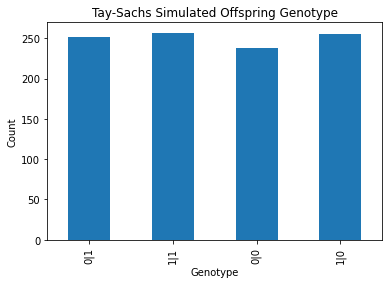

In [197]:
from collections import Counter
# for index, row in snp_df.iterrows():
ts_df = pd.read_csv('rs76173977_NA12761_NA12815_1000.tsv', sep='\t')
for index, row in ts_df.loc[ts_df['#CHROM'] == 15].iterrows():
        print(row['ID'] + row[5] + ' ' + row[6])
        gen_counts = Counter(row[7:].values)
        print(gen_counts)
        graph_df = pd.DataFrame.from_dict(gen_counts, orient='index')
        ax = graph_df.plot(kind='bar', legend=False)
        ax.set_title('Tay-Sachs Simulated Offspring Genotype')
        ax.set_xlabel('Genotype')
        ax.set_ylabel('Count')
        fig = ax.get_figure()
        fig.savefig('ts_dist.png')
        break
    

In [152]:
all_parent_df = pd.read_csv('all_parents.txt', sep='\t', names=header, index_col=False)

In [280]:
nf_snps = ['rs7161', 'rs4660761']

# snp_df.loc[snp_df['ID'] in nf_snps]
for snp in nf_snps:
    count = 0
    for i, row in all_parent_df.loc[snp_df['ID']==snp].iterrows():
        for col, val in row.iteritems():
            if '|' in str(val):
                count+=1
    print(count)

801
994


In [282]:
all_parent_df

,#CHROM,POS,ID,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144\n
0,1,44438974,rs7161,C,T,1|1,1|1,1|0,1|1,1|0,...,1|1,0|1,1|0,0|1,1|1,1|1,0|1,0|0,1|1,1|1
1,1,44440146,rs4660761,G,A,1|1,1|1,1|0,1|1,1|0,...,1|1,0|1,1|0,1|1,1|1,1|1,0|1,0|0,1|1,1|1
2,1,98552832,rs1198588,A,T,1|0,0|0,0|1,1|1,1|1,...,1|0,1|1,0|1,1|1,0|1,0|0,1|1,0|1,0|0,0|1
3,1,243663893,rs14403,C,T,0|0,0|0,1|0,0|0,0|1,...,0|0,0|0,0|0,0|0,0|0,1|0,0|0,0|0,1|0,0|0
4,2,200715388,rs2949006,T,G,1|1,0|1,1|1,1|1,1|1,...,1|1,1|1,1|1,1|1,1|1,1|1,1|1,1|1,1|0,1|1
5,2,233743109,rs778371,A,G,0|0,0|0,0|0,0|0,0|0,...,1|1,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|1
6,3,52838402,rs4687552,T,C,0|0,0|0,0|0,0|0,1|0,...,0|0,0|1,0|0,1|1,0|0,0|1,0|0,1|0,1|0,1|0
7,5,142780339,rs6189,C,T,0|0,0|0,0|0,0|0,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,1|0
8,5,152540354,rs2910032,C,T,0|0,0|1,0|1,0|0,0|1,...,0|1,1|0,0|0,1|0,1|0,0|1,0|1,1|0,0|1,0|0
9,6,35542476,rs3800373,C,A,1|0,0|1,0|0,1|1,1|1,...,0|0,1|1,0|1,0|0,1|0,0|1,0|0,1|1,1|1,0|1


In [159]:
all_parent_df.to_csv('all_parents_snps.tsv', sep='\t')

In [170]:
for i, row in all_parent_df.iterrows():
    if row['#CHROM'] != 15:
        continue
    print('ID: ' + row['ID'])
#     print(row.values)
    for j, gt in enumerate(row.values):
        if '|' not in str(gt):
            continue
        if '1' in gt:
            print(j)
#     break

ID: rs76173977
1737
1747
ID: rs121907970
1705
1743


In [177]:
print(all_parent_df.columns[1737])
print(all_parent_df.columns[1747])
print(all_parent_df.columns[1705])
print(all_parent_df.columns[1743])

NA12761
NA12815
NA12154
NA12778


In [289]:
nf_snp_df = pd.read_csv('all_parents_nf_snp.txt', header=None, sep='\t')

In [297]:
count = 0
for val in nf_snp_df.values[0]:
    if '|' in str(val) and '1' in str(val) and '0' not in str(val):
        count += 1
print(count)

13


In [1]:
import pandas as pd
scz_lo_df = pd.read_csv('final_prs_schizo_HG03690_NA18877_low.csv')
scz_hi_df = pd.read_csv('final_prs_schizo_HG00137_HG03887_high.csv')
scz_lo_hi_df = pd.read_csv('final_prs_schizo_HG01164_HG03663_low_high.csv')
scz_rand_df = pd.read_csv('final_prs_schizo_HG03108_HG01610_rand.csv')
df_par_scz = pd.read_csv('final_prs_schizophrenia_parents.csv')

In [161]:
ptsd_all_lo_df = pd.read_csv('final_prs_HG02947_NA19334_low_ptsd_1000_all.csv')
ptsd_all_hi_df = pd.read_csv('final_prs_HG02298_NA18530_high_ptsd_all.csv')
ptsd_all_lo_hi_df = pd.read_csv('final_prs_HG01326_HG02974_low_high_ptsd_all.csv')
ptsd_all_rand_df = pd.read_csv('final_prs_HG03108_HG01610_rand_ptsd_all.csv')
ptsd_all_par_df = pd.read_csv('final_prs_ptsd_all_parents.csv')

ptsd_lo_df = pd.read_csv('final_prs_HG02947_NA19334_low_ptsd_1000.csv')
ptsd_hi_df = pd.read_csv('final_prs_HG02298_NA18530_high_ptsd.csv')
ptsd_lo_hi_df = pd.read_csv('final_prs_HG01326_HG02974_low_high_ptsd.csv')
ptsd_rand_df = pd.read_csv('final_prs_HG03108_HG01610_rand_ptsd.csv')
ptsd_par_df = pd.read_csv('final_prs_ptsd_parents.csv')

In [75]:
samp_anc_df = pd.read_csv('sample_ancestry.csv')

In [127]:
# print(samp_anc_df.loc[samp_anc_df['Sample'] == 'HG03690'])
# print(samp_anc_df.loc[samp_anc_df['Sample'] == 'NA18877'])

scz_scat_arr = []
scz_scat_arr.append(['HG03690', df_par_scz.loc[df_par_scz['Individuals'] == 'HG03690']['Scores'].values[0], 'low-low'])
scz_scat_arr.append(['NA18877', df_par_scz.loc[df_par_scz['Individuals'] == 'NA18877']['Scores'].values[0], 'low-low'])
scz_scat_arr.append(['HG00137', df_par_scz.loc[df_par_scz['Individuals'] == 'HG00137']['Scores'].values[0], 'high-high'])
scz_scat_arr.append(['HG03887', df_par_scz.loc[df_par_scz['Individuals'] == 'HG03887']['Scores'].values[0], 'high-high'])
scz_scat_arr.append(['HG01164', df_par_scz.loc[df_par_scz['Individuals'] == 'HG01164']['Scores'].values[0], 'low-high'])
scz_scat_arr.append(['HG03663', df_par_scz.loc[df_par_scz['Individuals'] == 'HG03663']['Scores'].values[0], 'low-high'])
scz_scat_arr.append(['HG03108', df_par_scz.loc[df_par_scz['Individuals'] == 'HG03108']['Scores'].values[0], 'rand'])
scz_scat_arr.append(['HG01610', df_par_scz.loc[df_par_scz['Individuals'] == 'HG01610']['Scores'].values[0], 'rand'])
scz_scat_df = pd.DataFrame(scz_scat_arr, columns=['Sample', 'PRS', 'Parent Combination'])
scz_scat_df

,Sample,PRS,Parent Combination
0,HG03690,10.09667,low-low
1,NA18877,10.51785,low-low
2,HG00137,14.42553,high-high
3,HG03887,14.42344,high-high
4,HG01164,11.14884,low-high
5,HG03663,10.49859,low-high
6,HG03108,7.07688,rand
7,HG01610,5.31944,rand


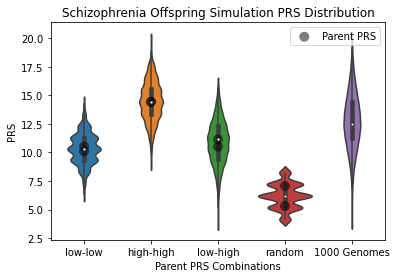

In [186]:
import seaborn as sb
scz_lo_scores = scz_lo_df['Scores'].values
scz_hi_scores = scz_hi_df['Scores'].values
scz_lo_hi_scores = scz_lo_hi_df['Scores'].values
scz_rand_scores = scz_rand_df['Scores'].values
scz_par_scores = df_par_scz['Scores'].values
sb.stripplot(x=scz_scat_df['Parent Combination'], y=scz_scat_df['PRS'], color='black', edgecolor='gray', size=10, jitter=False, alpha=0.5, label='Parent PRS')
ax = sb.violinplot(data=[scz_lo_scores, scz_hi_scores, scz_lo_hi_scores, scz_rand_scores, scz_par_scores])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[:1], labels[:1]) #, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='Parent PRS Combinations', ylabel='PRS', \
       xticklabels=['low-low', 'high-high', 'low-high', 'random', '1000 Genomes'], \
       title='Schizophrenia Offspring Simulation PRS Distribution')
# ax.set(title='Schizophrenia Offspring Simulation Distribution', )
fig = ax.get_figure()
fig.savefig('scz_violin_scat.png')


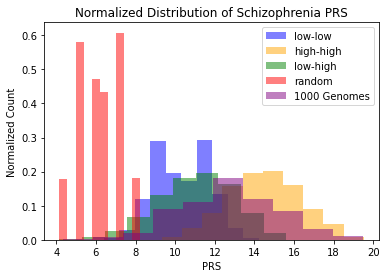

In [4]:
import matplotlib.pyplot as plt
plt.hist(scz_lo_scores, alpha=0.5, label='low-low', density=True, color='blue')
plt.hist(scz_hi_scores, alpha=0.5, label='high-high', density=True, color='orange')
plt.hist(scz_lo_hi_scores, alpha=0.5, label='low-high', density=True, color='green')
plt.hist(scz_rand_scores, alpha=0.5, label='random', density=True, color='red')
plt.hist(scz_par_scores, alpha=0.5, label='1000 Genomes', density=True, color='purple')
plt.title('Normalized Distribution of Schizophrenia PRS')
plt.xlabel('PRS')
plt.ylabel('Normalized Count')
plt.legend()
plt.savefig('scz_hist.png')

In [163]:
# ptsd_all_lo_scores = ptsd_all_lo_df['Scores'].values
# ptsd_all_hi_scores = ptsd_all_hi_df['Scores'].values
# ptsd_all_lo_hi_scores = ptsd_all_lo_hi_df['Scores'].values
# ptsd_all_rand_scores = ptsd_all_rand_df['Scores'].values
# ptsd_lo_scores = ptsd_lo_df['Scores'].values
# ptsd_hi_scores = ptsd_hi_df['Scores'].values
# ptsd_lo_hi_scores = ptsd_lo_hi_df['Scores'].values
# ptsd_rand_scores = ptsd_rand_df['Scores'].values
# b_data = {'ptsd_all': {ptsd_all_lo_scores, ptsd_all_hi_scores, ptsd_all_lo_hi_scores, ptsd_all_rand_scores}, 'ptsd': {ptsd_lo_scores, ptsd_hi_scores, ptsd_hi_lo_scores, ptsd_rand_scores}}
# sb.violinplot(data=b_data)


In [192]:
pa_lo = ptsd_all_lo_df['Scores'].values[1:]
p_lo = ptsd_lo_df['Scores'].values[1:]
pa_lo_hi = ptsd_all_lo_hi_df['Scores'].values[1:]
p_lo_hi = ptsd_lo_hi_df['Scores'].values[1:]
pa_hi = ptsd_all_hi_df['Scores'].values[1:]
p_hi = ptsd_hi_df['Scores'].values[1:]
pa_rand = ptsd_all_rand_df['Scores'].values[1:]
p_rand = ptsd_rand_df['Scores'].values[1:]

ptsd_arrs = [pa_lo, p_lo, pa_lo_hi, p_lo_hi, pa_hi, p_hi, pa_rand, p_rand]
ptsd_cats = ['low-low', 'low-high', 'high-high', 'random']
ptsd_type = ['PTSD All', 'PTSD']
ptsd_arr = []
for i, ar in enumerate(ptsd_arrs):
    cat = ptsd_cats[i//2]
    score_type = ptsd_type[i%2]
    for s in ar:
        ptsd_arr.append([s, cat, score_type])
ptsd_df = pd.DataFrame(ptsd_arr, columns=['Scores', 'Parent Combination', 'Types'])


In [165]:
# ptsd_test = []
# for score in pa_lo:
#     ptsd_test.append([score, 'low-low', 'PTSD All'])
# for score in p_lo:
#     ptsd_test.append([score, 'low-low', 'PTSD'])
# for score in pa_lo_hi:
#     ptsd_test.append([score, 'low-high', 'PTSD All'])
# for score in p_lo_hi:
#     ptsd_test.append([score, 'low-high', 'PTSD'])
# for score in pa_hi:
#     ptsd_test.append([score, 'high-high', 'PTSD All'])
# for score in p_hi:
#     ptsd_test.append([score, 'high-high', 'PTSD'])
# for score in pa_rand:
#     ptsd_test.append([score, 'random', 'PTSD All'])
# for score in p_rand:
#     ptsd_test.append([score, 'random', 'PTSD'])
# ptsd_test_df = pd.DataFrame(ptsd_test, columns=['Scores', 'Parent Combination', 'Types'])

In [193]:
scat_arr = []
non_scat_arr = []
# print(ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'HG02947']['Scores'].values[0])
# print(ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'NA19334']['Scores'].values[0])
scat_arr.append(['HG02947', ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'HG02947']['Scores'].values[0], 'low-low'])
scat_arr.append(['NA19334', ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'HG02947']['Scores'].values[0], 'low-low'])

non_scat_arr.append(['HG02947', ptsd_par_df.loc[df_par_scz['Individuals'] == 'HG02947']['Scores'].values[0], 'low-low'])
non_scat_arr.append(['NA19334', ptsd_par_df.loc[df_par_scz['Individuals'] == 'HG02947']['Scores'].values[0], 'low-low'])

# print(ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'HG02298']['Scores'].values[0])
# print(ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'NA18530']['Scores'].values[0])
scat_arr.append(['HG02298', ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'HG02298']['Scores'].values[0], 'high-high'])
scat_arr.append(['NA18530', ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'NA18530']['Scores'].values[0], 'high-high'])
non_scat_arr.append(['HG02298', ptsd_par_df.loc[df_par_scz['Individuals'] == 'HG02298']['Scores'].values[0], 'high-high'])
non_scat_arr.append(['NA18530', ptsd_par_df.loc[df_par_scz['Individuals'] == 'NA18530']['Scores'].values[0], 'high-high'])

# print(ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'HG01326']['Scores'].values[0])
# print(ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'HG02974']['Scores'].values[0])
scat_arr.append(['HG01326', ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'HG01326']['Scores'].values[0], 'low-high'])
scat_arr.append(['HG02974', ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'HG02974']['Scores'].values[0], 'low-high'])
non_scat_arr.append(['HG01326', ptsd_par_df.loc[df_par_scz['Individuals'] == 'HG01326']['Scores'].values[0], 'low-high'])
non_scat_arr.append(['HG02974', ptsd_par_df.loc[df_par_scz['Individuals'] == 'HG02974']['Scores'].values[0], 'low-high'])


# print(ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'HG03108']['Scores'].values[0])
# print(ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'HG01610']['Scores'].values[0])
scat_arr.append(['HG03108', ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'HG03108']['Scores'].values[0], 'rand'])
scat_arr.append(['HG01610', ptsd_all_par_df.loc[df_par_scz['Individuals'] == 'HG01610']['Scores'].values[0], 'rand'])
non_scat_arr.append(['HG03108', ptsd_par_df.loc[df_par_scz['Individuals'] == 'HG03108']['Scores'].values[0], 'rand'])
non_scat_arr.append(['HG01610', ptsd_par_df.loc[df_par_scz['Individuals'] == 'HG01610']['Scores'].values[0], 'rand'])
# HG02947_NA19334_low_ptsd_all.csv')
# 'final_prs_HG02298_NA18530_high_ptsd_all.csv')
# ptsd_all_lo_hi_df = pd.read_csv('final_prs_HG01326_HG02974_low_high_ptsd_all.csv')
# ptsd_all_rand_df = pd.read_csv('final_prs_HG03108_HG01610

In [194]:
scat_df = pd.DataFrame(scat_arr, columns=['Sample', 'Score', 'Parent Combination'])
non_scat_df = pd.DataFrame(non_scat_arr, columns=['Sample', 'Score', 'Parent Combination'])


In [195]:
non_scat_df

,Sample,Score,Parent Combination
0,HG02947,3.996472,low-low
1,NA19334,3.996472,low-low
2,HG02298,8.090980,high-high
3,NA18530,10.078028,high-high
4,HG01326,3.987566,low-high
5,HG02974,6.001121,low-high
6,HG03108,4.987348,rand
7,HG01610,6.982898,rand


<AxesSubplot:xlabel='Parent Combination', ylabel='Scores'>

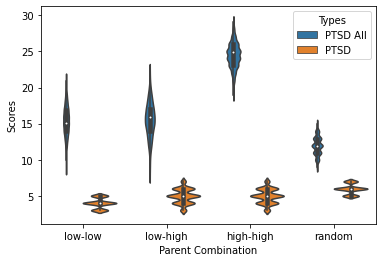

In [166]:
sb.violinplot(x=ptsd_df['Parent Combination'], y=ptsd_df['Scores'], hue=ptsd_df['Types'])
# sb.violinplot(x=ptsd_test_df['Parent Combination'], y=ptsd_test_df['Scores'])
# sb.stripplot(x=scat_df['Parent Combination'], y=scat_df['Score'], color='black', edgecolor='gray', size=10, jitter=False)


In [136]:
scat_df

,Sample,Score,Parent Combination
0,HG02947,13.023642,low-low
1,NA19334,13.023642,low-low
2,HG01326,20.991048,high-high
3,HG02974,14.035981,high-high
4,HG02298,22.035481,low-high
5,NA18530,30.995697,low-high
6,HG03108,11.993231,rand
7,HG01610,15.881543,rand


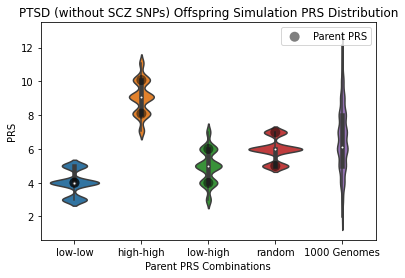

In [196]:
sb.stripplot(x=non_scat_df['Parent Combination'], y=non_scat_df['Score'], color='black', edgecolor='gray', size=10, jitter=False, alpha=0.5, label='Parent PRS')
ax = sb.violinplot(data=[p_lo, p_hi, p_lo_hi, p_rand, ptsd_par_df['Scores'].values])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[:1], labels[:1]) #, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='Parent PRS Combinations', ylabel='PRS', \
       xticklabels=['low-low', 'high-high', 'low-high', 'random', '1000 Genomes'], \
       title='PTSD (without SCZ SNPs) Offspring Simulation PRS Distribution')
# ax.set(title='Schizophrenia Offspring Simulation Distribution', )
fig = ax.get_figure()
fig.savefig('ptsd_violin_scat.png')

In [5]:
df_par_scz.loc[df_par_scz['Individuals'] == 'HG01610'] 

,Unnamed: 0,Individuals,Scores
550,550,HG01610,5.31944


In [217]:
from statsmodels.stats import weightstats 
# stats tests scz
# pop: df_par_scz
# scz_lo_df, scz_hi_df, scz_lo_hi_df, scz_rand_df
# scz_scat_df
null_hyp_val = np.mean(scz_scat_df.loc[scz_scat_df['Parent Combination'] == 'high-high']['PRS'].values)
os_dist = scz_hi_df['Scores'].values[1:]
pop_dist = df_par_scz['Scores'].values

In [218]:
print(weightstats.ztest(os_dist, value=null_hyp_val))
print(weightstats.ztest(os_dist, pop_dist))

(1.4337791872655654, 0.15163528611578436)
(20.87671617611472, 8.71815488313839e-97)


In [225]:
ptsd_all_lo_df

,Unnamed: 0,Individuals,Scores
0,0,NA19334,17.877797
1,1,OS_0,15.927069
2,2,OS_1,16.885731
3,3,OS_2,13.988644
4,4,OS_3,15.027855
...,...,...,...
996,996,OS_995,14.929199
997,997,OS_996,13.965129
998,998,OS_997,15.991364
999,999,OS_998,16.868574


In [231]:
scat_df

,Sample,Score,Parent Combination
0,HG02947,13.023642,low-low
1,NA19334,13.023642,low-low
2,HG02298,22.035481,high-high
3,NA18530,30.995697,high-high
4,HG01326,20.991048,low-high
5,HG02974,14.035981,low-high
6,HG03108,11.993231,rand
7,HG01610,15.881543,rand


In [235]:
# stats tests scz
# pop: ptsd_all_par_df
# ptsd_all_lo_df, ptsd_all_hi_df, ptsd_all_lo_hi_df, ptsd_all_rand_df
# scat_df
null_hyp_val = np.mean(scat_df.loc[scat_df['Parent Combination'] == 'low-low']['Score'].values)
os_dist = pa_lo
pop_dist = ptsd_all_par_df['Scores'].values
print(weightstats.ztest(os_dist, value=null_hyp_val))
print(weightstats.ztest(os_dist, pop_dist))

(38.759772680137395, 0.0)
(-44.21520069237569, 0.0)


In [239]:
# stats tests scz
# pop: ptsd_par_df
# ptsd_lo_df, ptsd_hi_df, ptsd_lo_hi_df, ptsd_rand_df
# non_scat_df
null_hyp_val = np.mean(non_scat_df.loc[non_scat_df['Parent Combination'] == 'rand']['Score'].values)
os_dist = p_rand
pop_dist = ptsd_par_df['Scores'].values
print(weightstats.ztest(os_dist, value=null_hyp_val))
print(weightstats.ztest(os_dist, pop_dist))

(-1.5122906189556735, 0.13045994649662382)
(-10.837225542259146, 2.2932038168160664e-27)
